# Churn Patterns & Gender Disparities: Customer Behavior EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Tesco.csv',encoding='unicode_escape')
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,LeftMembership
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
pd.isnull(df).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
LeftMembership      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df['TotalCharges'] = df['TotalCharges'].str.strip()  # Remove leading and trailing whitespaces
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric, coerce errors to NaN
df['TotalCharges'] = df['TotalCharges'].fillna(0.0)  # Replace NaN values with 0.0

# Finally, convert the column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Column Rename
df.rename(columns={'InternetService':'InternetServiceProvider'})

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetServiceProvider,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,LeftMembership
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df[['OnlineSecurity','DeviceProtection','TechSupport']].describe()

,OnlineSecurity,DeviceProtection,TechSupport
count,7043,7043,7043
unique,3,3,3
top,No,No,No
freq,3498,3095,3473


# Exploratory Data Analysis

### Gender

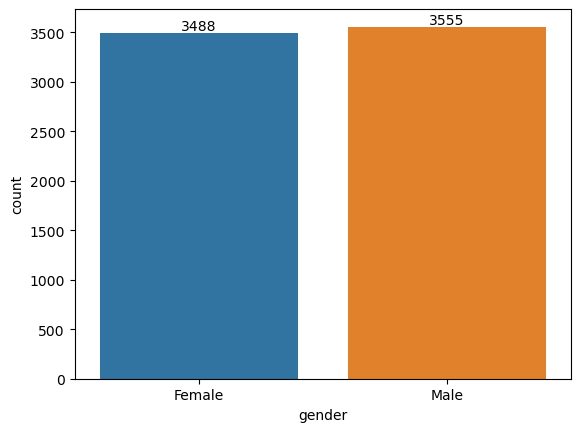

In [11]:
ax=sns.countplot(x='gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

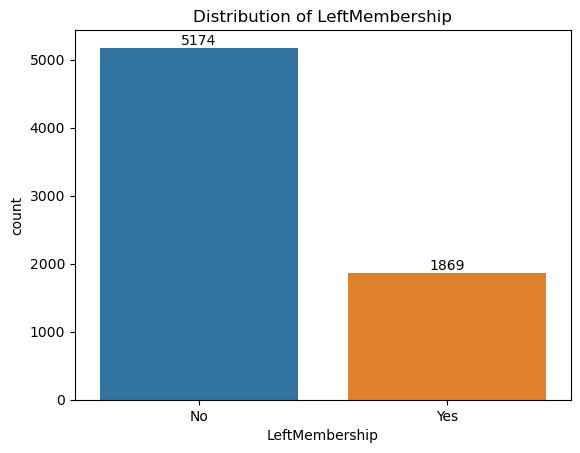

In [12]:
ax=sns.countplot(x='LeftMembership', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of LeftMembership')
plt.show()

In [13]:
# Assuming 'df' is your DataFrame
total_customers = len(df)
not_left_percentage = (df['LeftMembership'].value_counts(normalize=True) * 100).loc['No']
churned_percentage = (df['LeftMembership'].value_counts(normalize=True) * 100).loc['Yes']

print(f"Approximately {not_left_percentage:.2f}% of customers have not left, while {churned_percentage:.2f}% have churned.")


Approximately 73.46% of customers have not left, while 26.54% have churned.


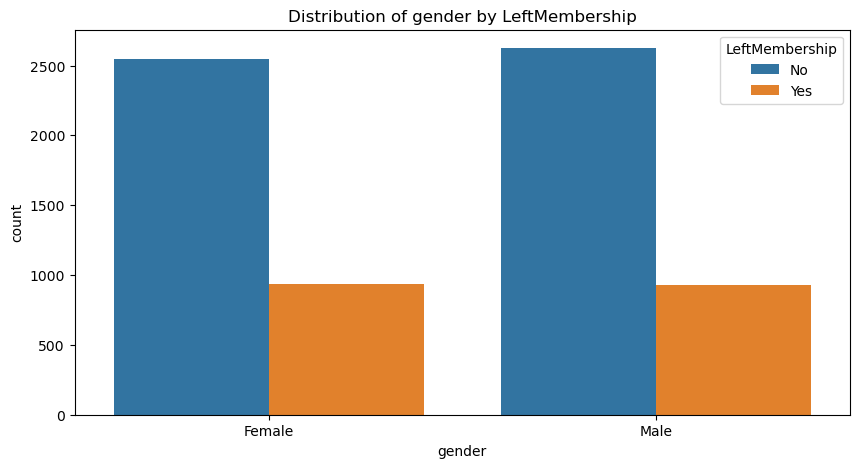

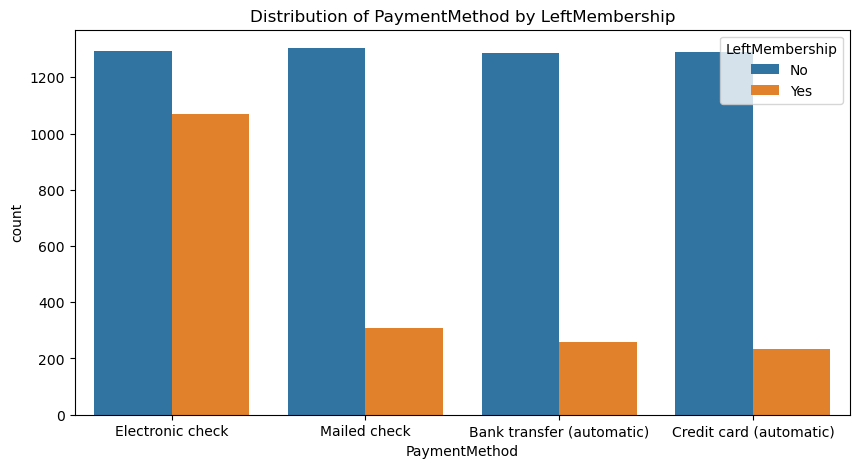

In [14]:
categorical_columns = ['gender', 'PaymentMethod']

# Plot countplots for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df, hue='LeftMembership')
    plt.title(f'Distribution of {column} by LeftMembership')
    plt.show()

<Axes: xlabel='gender', ylabel='TotalCharges'>

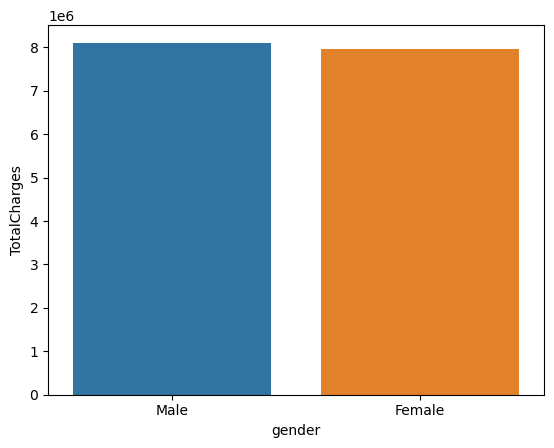

In [15]:
sales_data = df.groupby(['gender'],as_index=False)['TotalCharges'].sum().sort_values(by='TotalCharges',ascending=False)
sns.barplot(x='gender',y='TotalCharges',data=sales_data)

From the observed graphs, it is evident that a majority of buyers using clubcards are males, and the purchasing power of males is higher than that of females.

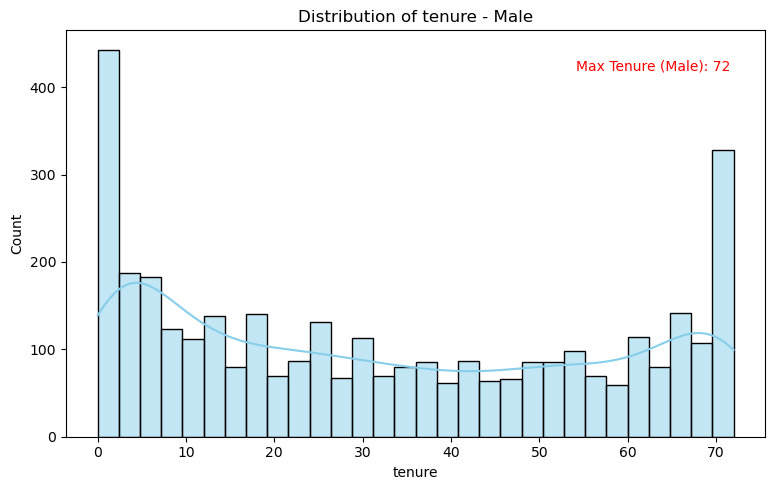

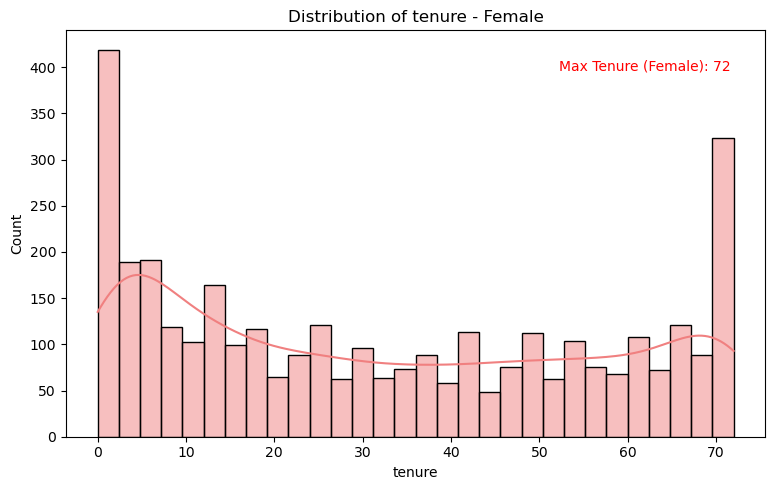

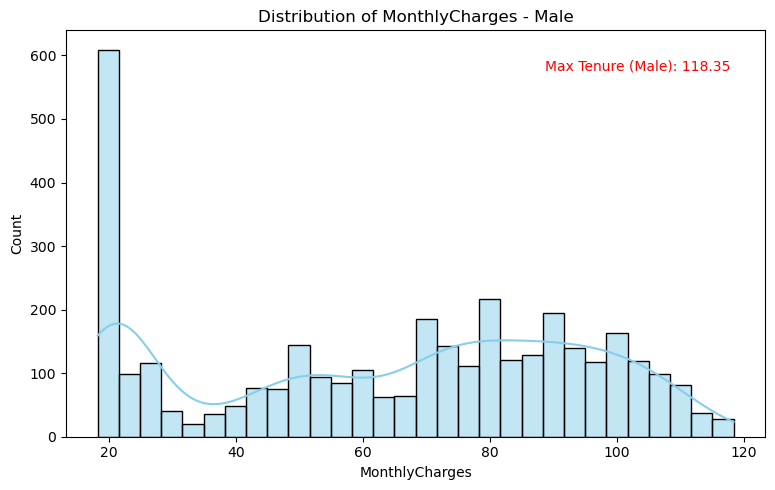

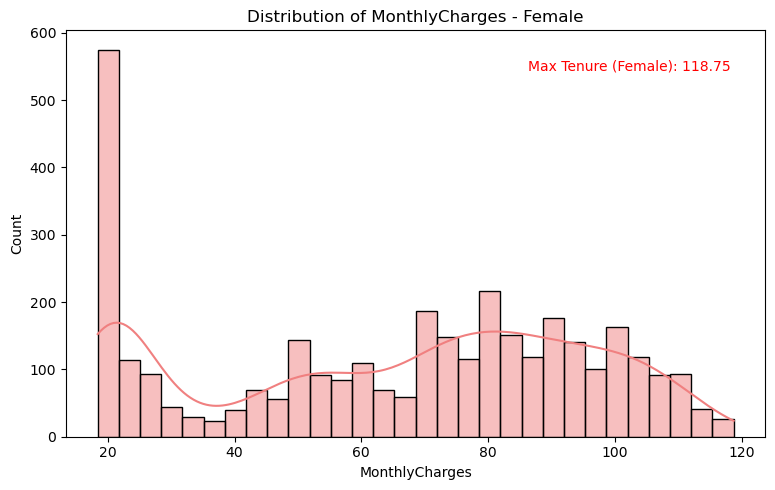

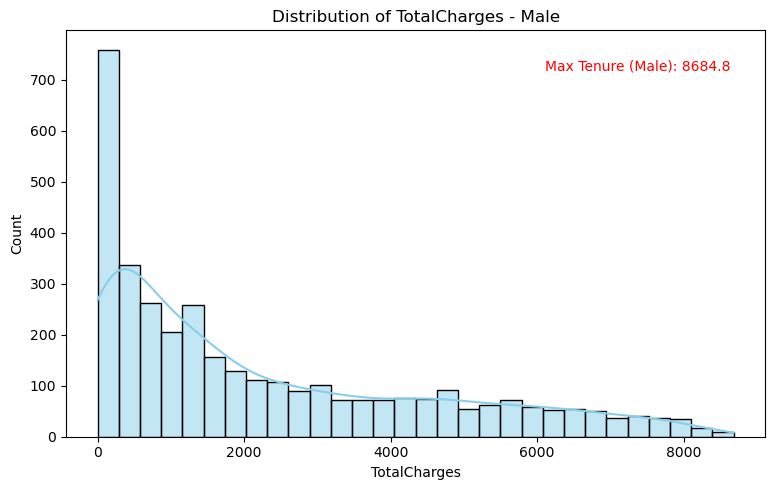

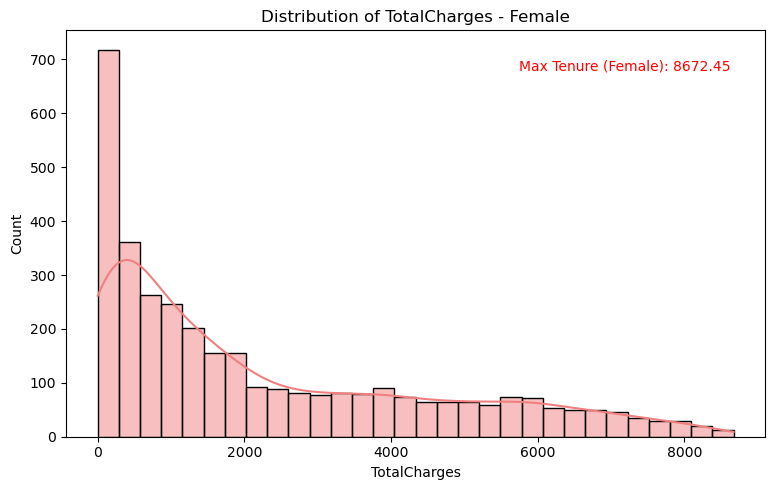

In [16]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.set_palette("viridis")

for column in numerical_columns:
    plt.figure(figsize=(15, 5))
    
    # Create subplot for male customers
    plt.subplot(1, 2, 1)
    male_data = df[df['gender'] == 'Male'][column]
    sns.histplot(male_data, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column} - Male')
    
    # Add maximum tenure value for males
    max_tenure_male = male_data.max()
    plt.text(0.95, 0.9, f'Max Tenure (Male): {max_tenure_male}', transform=plt.gca().transAxes, color='red', ha='right')
    
    plt.tight_layout()  # Ensure proper spacing
    
    # Create subplot for female customers
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    female_data = df[df['gender'] == 'Female'][column]
    sns.histplot(female_data, kde=True, bins=30, color='lightcoral')
    plt.title(f'Distribution of {column} - Female')
    
    # Add maximum tenure value for females
    max_tenure_female = female_data.max()
    plt.text(0.95, 0.9, f'Max Tenure (Female): {max_tenure_female}', transform=plt.gca().transAxes, color='red', ha='right')
    
    plt.tight_layout()  # Ensure proper spacing
    
    plt.show()

# Conclusion

Approximately 73.46% of customers have not left, while 26.54% have churn

Customers utilizing the 'Mailed check' payment method, especially males, show a higher likelihood of leaving the membership compared to other payment types and female counterparts.